In [1]:
## ======================================================================
#            Importing the necessary modules and tools
## ======================================================================

import pandas as pd; import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor


# from sklearn.metrics import necessary metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score , accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Preprocessing tools
from sklearn.preprocessing import MinMaxScaler


# Set notebook options
# --------------------
pd.options.display.float_format = '{:,.3f}'.format
%matplotlib inline

In [11]:
url = "https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/bike_rentals.csv"
bi_ren = pd.read_csv(url)

In [13]:
print("*" *50)
bi_ren.info()
print("*" *50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     731 non-null    float64
 6   weekday     731 non-null    float64
 7   workingday  731 non-null    float64
 8   weathersit  731 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         728 non-null    float64
 12  windspeed   726 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 91.5+ KB
******************************************

In [19]:
print("*" *50)
print(bi_ren.head())
print("*" *50)

**************************************************
   instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   1.000 0.000 1.000    0.000    6.000       0.000   
1        2  2011-01-02   1.000 0.000 1.000    0.000    0.000       0.000   
2        3  2011-01-03   1.000 0.000 1.000    0.000    1.000       1.000   
3        4  2011-01-04   1.000 0.000 1.000    0.000    2.000       1.000   
4        5  2011-01-05   1.000 0.000 1.000    0.000    3.000       1.000   

   weathersit  temp  atemp   hum  windspeed  casual  registered   cnt  
0           2 0.344  0.364 0.806      0.160     331         654   985  
1           2 0.363  0.354 0.696      0.249     131         670   801  
2           1 0.196  0.189 0.437      0.248     120        1229  1349  
3           1 0.200  0.212 0.590      0.160     108        1454  1562  
4           1 0.227  0.229 0.437      0.187      82        1518  1600  
**************************************************


In [23]:
print("*" *50)
print (bi_ren.describe().T)
print("*" *50)

**************************************************
             count      mean       std    min       25%       50%       75%  \
instant    731.000   366.000   211.166  1.000   183.500   366.000   548.500   
season     731.000     2.497     1.111  1.000     2.000     3.000     3.000   
yr         730.000     0.500     0.500  0.000     0.000     0.500     1.000   
mnth       730.000     6.512     3.448  1.000     4.000     7.000     9.750   
holiday    731.000     0.029     0.167  0.000     0.000     0.000     0.000   
weekday    731.000     2.997     2.005  0.000     1.000     3.000     5.000   
workingday 731.000     0.683     0.466  0.000     0.000     1.000     1.000   
weathersit 731.000     1.395     0.545  1.000     1.000     1.000     2.000   
temp       730.000     0.496     0.183  0.059     0.337     0.499     0.656   
atemp      730.000     0.475     0.163  0.079     0.338     0.487     0.609   
hum        728.000     0.628     0.142  0.000     0.522     0.627     0.730   
w

In [26]:
print("*" *50)
print(bi_ren.shape)
print("*" *50)

**************************************************
(731, 16)
**************************************************


In [25]:
print("*" *50)
print(bi_ren.isnull().sum())
print("*" *50)

**************************************************
instant       0
dteday        0
season        0
yr            1
mnth          1
holiday       0
weekday       0
workingday    0
weathersit    0
temp          1
atemp         1
hum           3
windspeed     5
casual        0
registered    0
cnt           0
dtype: int64
**************************************************


<AxesSubplot:>

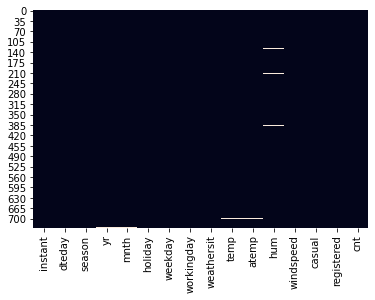

In [28]:
#Using heatmap to check for missing values
#----------------------------------------------------
sns.heatmap(bi_ren.isnull(), cbar = False)

In [ ]:
# as we see, there are missing values but honostly i don't now how to deal with them(deletting or imputation? use mean or median???)

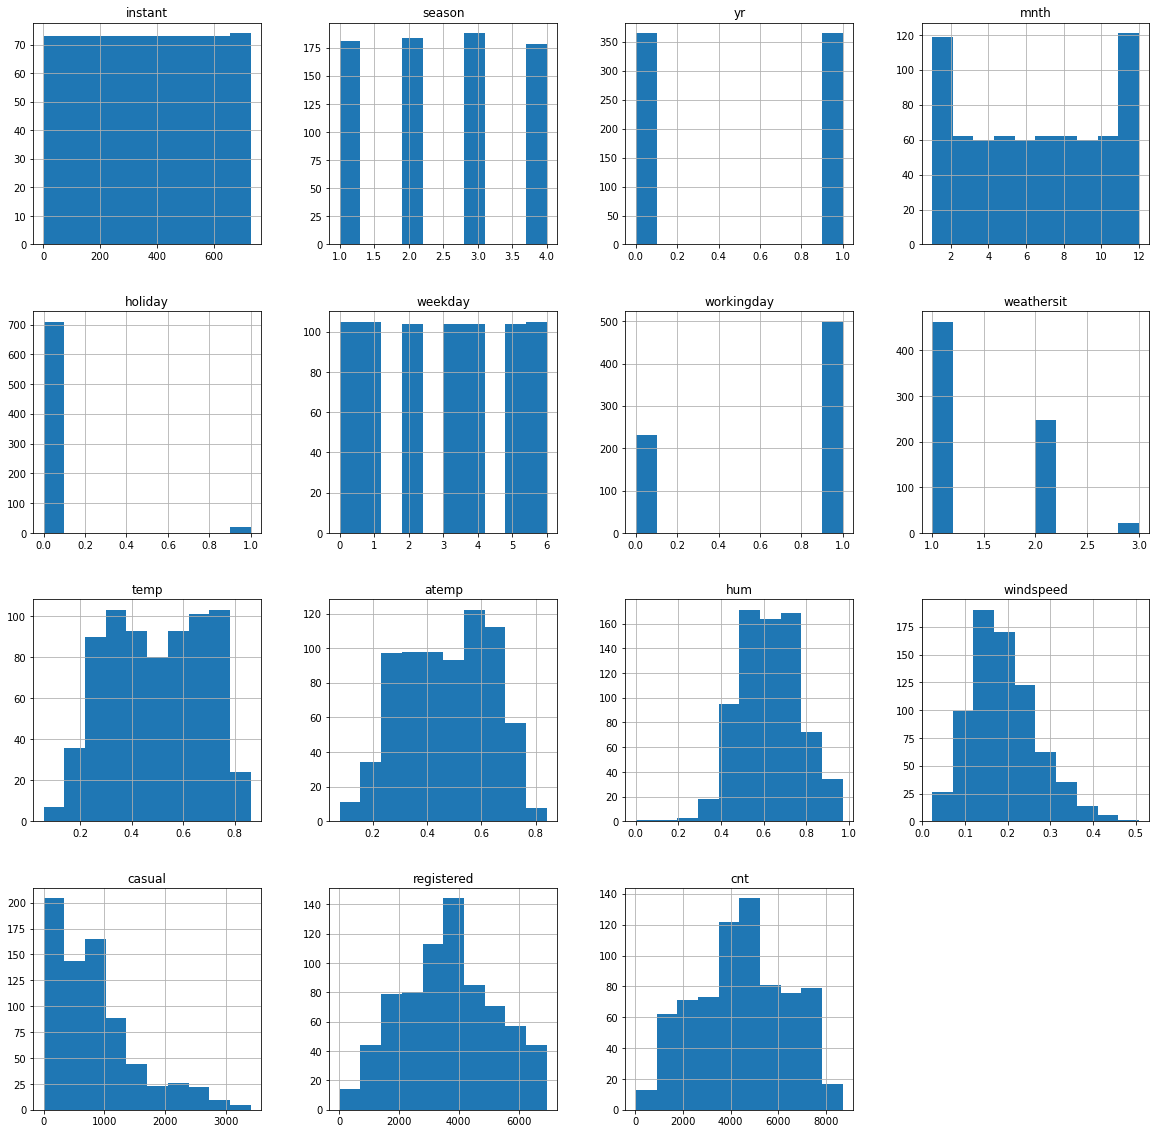

In [30]:
_ = bi_ren.hist(figsize = (20,20)

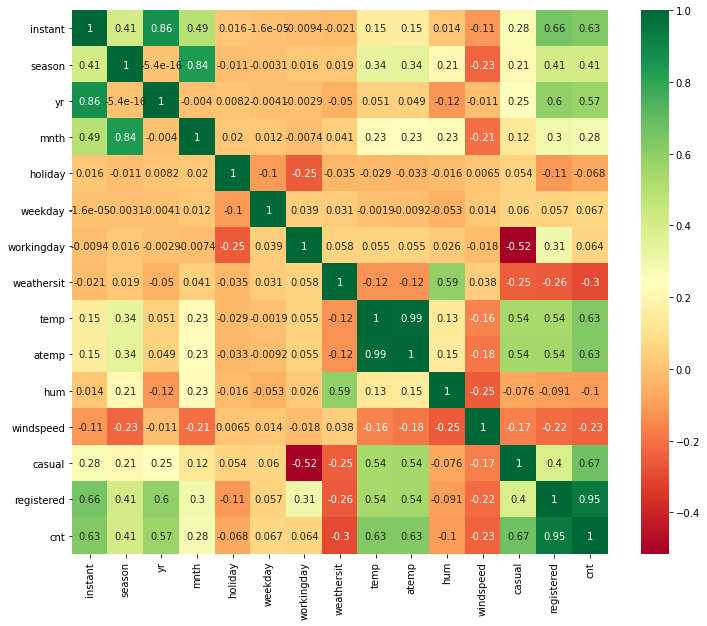

In [35]:
#     The Correlation Matrix 

plt.figure(figsize=(12,10))
p=sns.heatmap(bi_ren.corr(), annot=True, cmap ='RdYlGn')

In [47]:
bi_ren.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = bi_ren.drop(["cnt"],axis = 1)
X = scaler.fit_transform(X)
y = bi_ren.cnt

X_bi_ren = pd.DataFrame(X, columns=bi_ren.columns[:-1])
X_bi_ren.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.000,0.499,0.370,0.000,0.333,0.667,0.667,1.000
yr,731.000,0.500,0.500,0.000,0.000,0.500,1.000,1.000
mnth,731.000,0.501,0.313,0.000,0.273,0.545,0.773,1.000
holiday,731.000,0.029,0.167,0.000,0.000,0.000,0.000,1.000
weekday,731.000,0.500,0.334,0.000,0.167,0.500,0.833,1.000
workingday,731.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
weathersit,731.000,0.198,0.272,0.000,0.000,0.000,0.500,1.000
temp,731.000,0.544,0.228,0.000,0.346,0.548,0.743,1.000
hum,731.000,0.646,0.146,0.000,0.537,0.645,0.750,1.000
windspeed,731.000,0.346,0.160,0.000,0.232,0.327,0.435,1.000


In [50]:
#  splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.70,
                                                    test_size = 0.30, 
                                                    random_state = 42)
print("*" *50)
print("The train features shape is: ", X_train.shape)
print("The test features shape is: ", X_test.shape)
print("The train target shape is: ", y_train.shape)
print("The test target shape is: ", y_test.shape)
print("*" *50)

**************************************************
The train features shape is:  (511, 12)
The test features shape is:  (220, 12)
The train target shape is:  (511,)
The test target shape is:  (220,)
**************************************************


In [55]:
# training RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
preds = rf_reg.predict(X_test)
from sklearn.metrics import r2_score
score_1 = rf_reg.score(X_test, y_test)
score_2 = rf_reg.score(X_train, y_train)
print("*" *50)
print("testing score : {:.2f}".format(score_1))
print("training score : {:.2f}".format(score_2))
print("*" *50)

**************************************************
testing score : 1.00
training score : 1.00
**************************************************


In [78]:
# training gradientboosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)
print("Model Accuracy: %.3f"% gb_reg.score(X_train, y_train))

Model Accuracy: 0.999


In [70]:
# training LinearRegression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg
l_reg.fit(X_train,y_train)
pred = l_reg.predict(X_test)

In [72]:
lr=l_reg.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',l_reg.coef_)
print('Model intercept value :',l_reg.intercept_)

Accuracy of the model : 1.0
Model coefficients : [-6.40572110e-12 -3.18323146e-12  5.45696821e-12 -8.66862138e-13
  2.13802309e-11 -1.64845915e-12 -1.54187774e-12  5.68434189e-13
 -1.13686838e-13  1.30739863e-12  3.40800000e+03  6.92600000e+03]
Model intercept value : 21.99999999998454


In [62]:
## training DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
d_tr_reg = DecisionTreeRegressor(min_samples_split = 2, max_leaf_nodes = 5)

In [63]:
d_tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

In [67]:
dtr_score = d_tr_reg.score(X_train, y_train)
print("Accuracy of the model :" ,dtr_score)

Accuracy of the model : 0.8720452508788407
